# Midterm Project: Classification Analysis

#### **Author**: Brett Vrtachnik
#### **Date**: 4/4/2025
#### **Introduction**: This project uses machine learning classification techniques to predict whether a mushroom is edible or poisonous based on its physical characteristics. The dataset, sourced from the UCI Machine Learning Repository, contains only categorical features describing traits such as odor and gill color. After exploring and encoding the data, two models — a Decision Tree and a Random Forest — were trained and evaluated to compare performance. The goal was to demonstrate how effective predictions can be made using a limited number of strong features and simple classification models.

## Section 1. Import and Inspect the Data

### Import Dependencies

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### 1.1 Load the Dataset and Display the First 10 Rows

In [39]:
df = pd.read_csv(r'C:\Projects\applied-ml-bvrtachnik\midterm\mushroom_dataset\agaricus-lepiota.data', header=0)

df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### 1.2 Check for Missing Values and Display Summary Statistics

In [40]:
# Check for missing values
print(df.isnull().sum())
print('\n' + '_'*50 + '\n')

# Summary statistics
print(df.describe(include='all'))
print('\n' + '_'*50 + '\n')

# Check the data types of the columns
print(df.dtypes)



class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

__________________________________________________

       class cap-shape cap-surface cap-color bruises?  odor gill-attachment  \
count   8124      8124        8124      8124     8124  8124            8124   
unique     2         6           4        10        2     9               2   
top    

#### Reflection 1

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

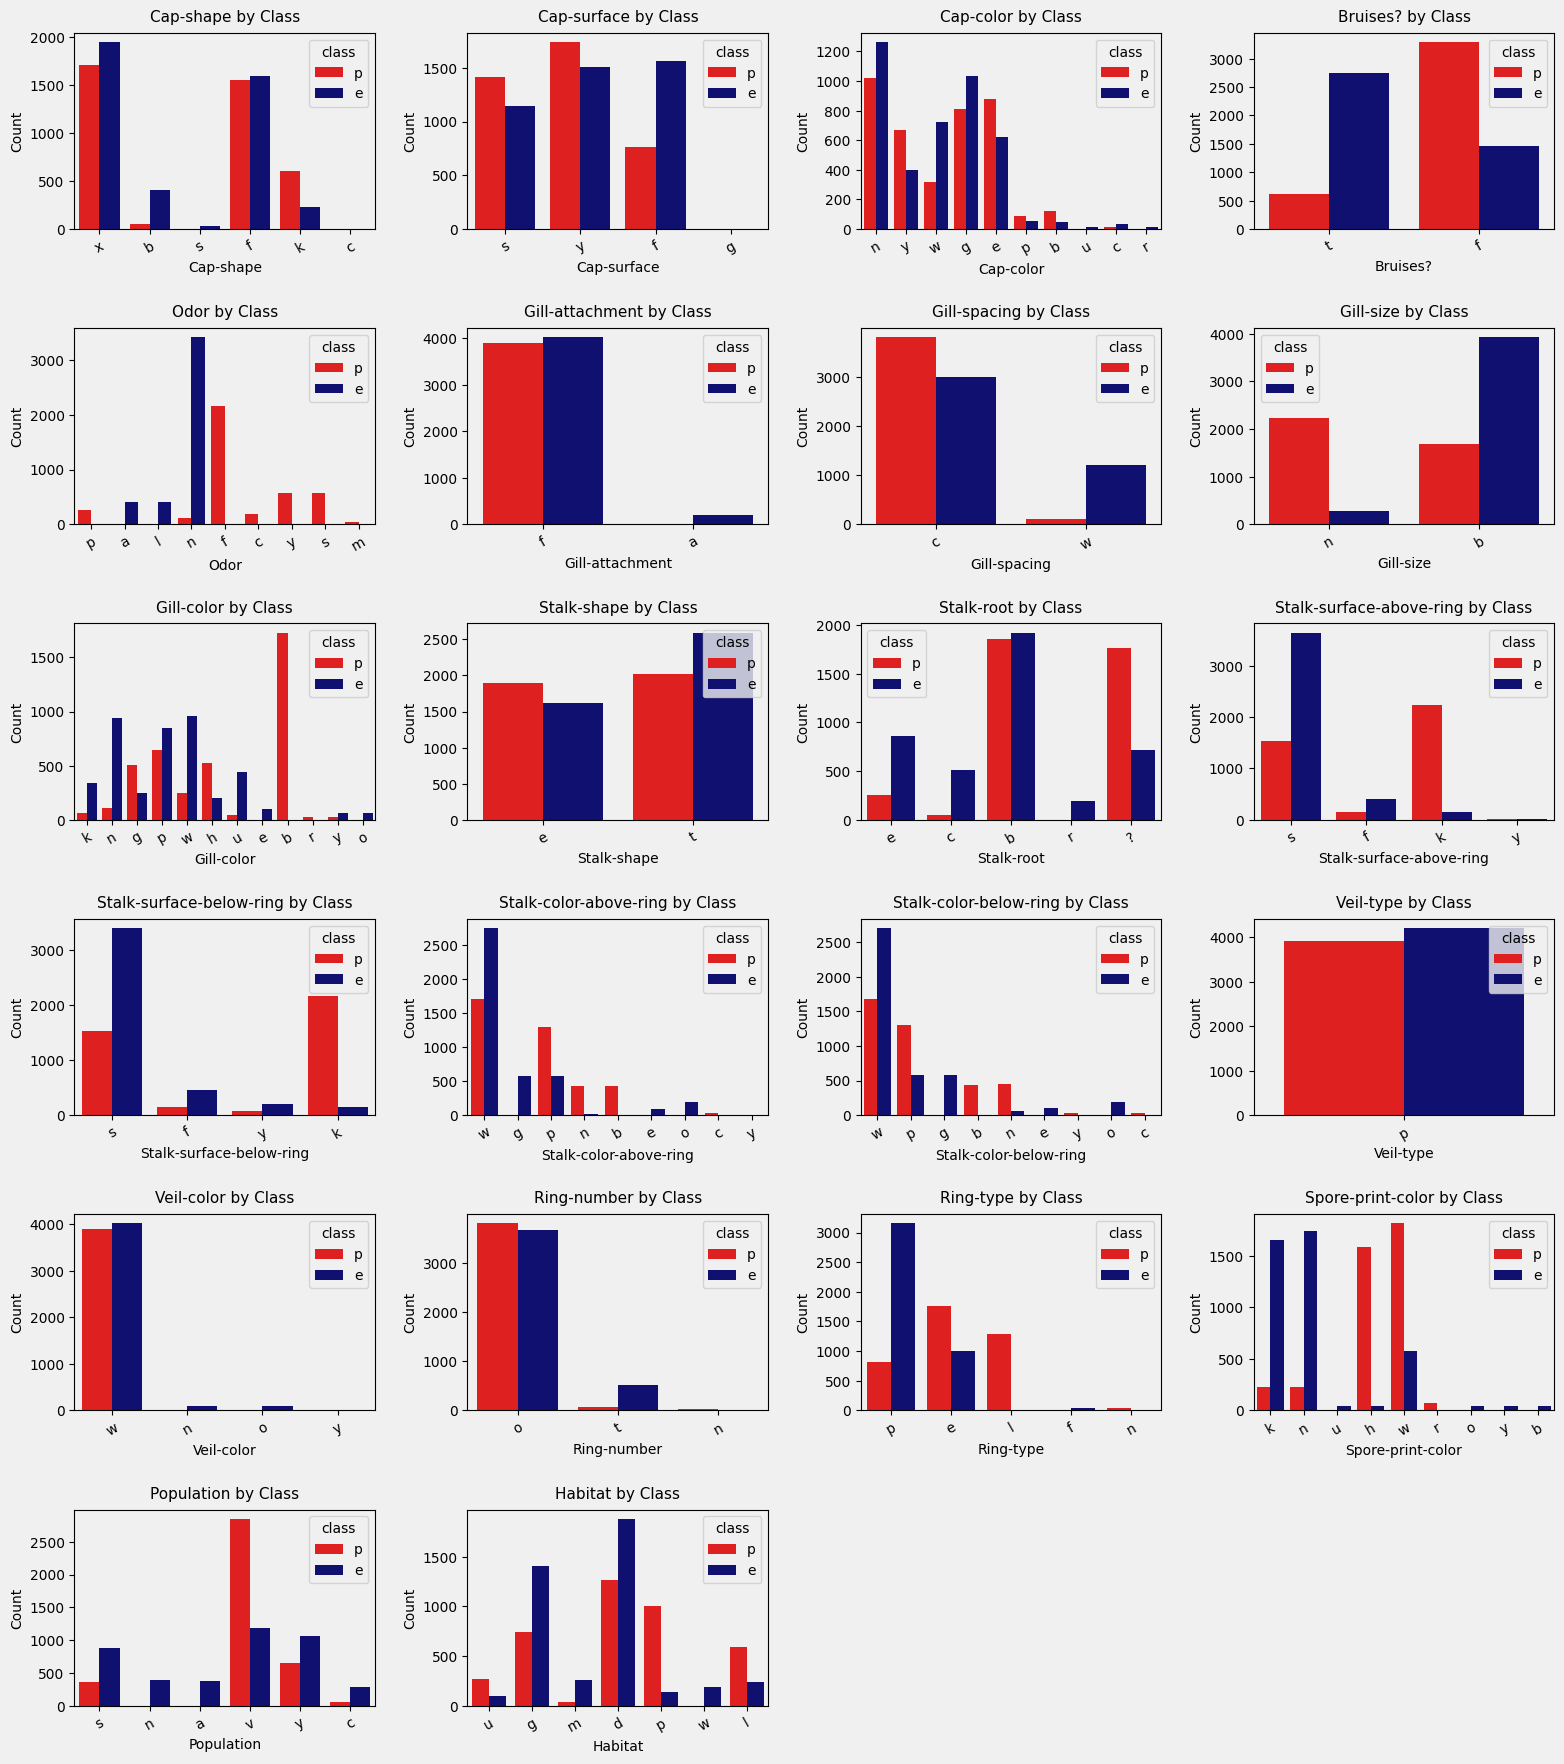

In [41]:
# Optional: Set a visual style

plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['figure.facecolor'] = '#f0f0f0'

# Choose colors for edible (e) and poisonous (p)
custom_palette = {'e': 'navy', 'p': 'red'}

categorical_cols = df.columns[1:]  # Skip 'class' as it's the target
num_cols = len(categorical_cols)

categorical_cols = df.columns[1:]
num_cols = len(categorical_cols)

cols = 4
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 3))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='class', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} by Class', fontsize=11, pad=8)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### 2.2 Handle Missing Values and Clean Data

#### Handling Missing Values - Imputation
- The ```stalk-root``` columns containts missing values represented by the character ```'?'```. Rather than removing these rows, we chose to impute the missing values using the mode. This approach maintains the full dataset while providing a reasonable substitute for the missing entries.

In [42]:
# Replace '?' in 'stalk-root' with the most frequent value (mode)
most_common = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', most_common)


#### Encode Categorical Features
- Since all features in the dataset are categorical, we applied label encoding to convert each column into a numerical format.
- After encoding, we verified that all columns were successfully converted by confirming that their data types are numerical (```int64```)

In [43]:
# Encode categorical variables using LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Verify the encoding
print(df_encoded.dtypes)


class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises?                    int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- **Input features:** `odor` and `gill-color`
- **Target feature:** `class` (indicates whether the mushroom is edible or poisonous)


### 3.2 Define X and y 

In [44]:
# Define X and y using just the selected features
X = df_encoded[['odor', 'gill-color']]
y = df_encoded['class']


#### Section 3 Reflection
- I selected `odor` and `gill-color` because both features showed strong separation between edible and poisonous mushrooms during data exploration. These features are highly relevant to the classification goal and help simplify the model without sacrificing predictive power.

## Section 4. Train a Classification Model(**Decision Tree**)

### 4.1 Split the data into training and test sets

In [45]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]


print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  6499 Test size:  1625


### 4.2 Create and Train Model (**Decision Tree**)

In [46]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [47]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3366
           1       1.00      0.98      0.99      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       842
           1       1.00      0.97      0.98       783

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625



#### Decision Tree Confusion Matrix

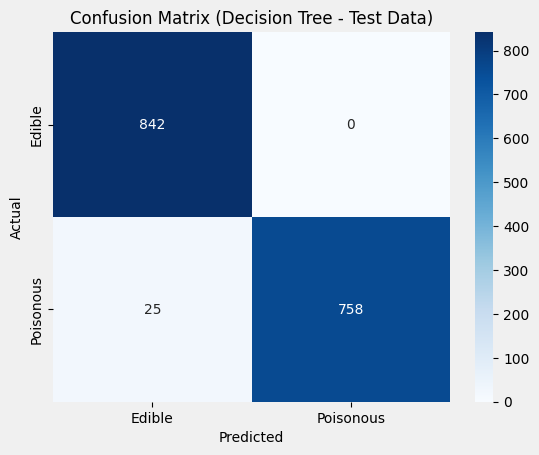

In [48]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',  # no scientific notation
            cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree - Test Data)')
plt.show()

#### Reflection 4:

The decision tree classifier performed well, achieving 99% accuracy on the training data and 98% on the test set. Precision and recall were high for both edible and poisonous mushrooms, indicating that the model was able to distinguish between the two classes effectively.

The slight drop in performance from training to test data suggests some potential overfitting, which is common with unpruned decision trees. However, the gap was small, and the model still generalized well. Using only two features, the classifier demonstrated strong predictive power. Further improvement could be explored through pruning or by using an ensemble method such as a random forest.

## Section 5: Try an Alternative Model (**Random Forest**)

### 5.1 Create and Train the Model

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict and Evaluate Model Performance

In [50]:
# Predict on training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Classification report for training data
print("Random Forest - Training Performance:")
print(classification_report(y_train, y_train_pred_rf))

# Classification report for test data
print("Random Forest - Test Performance:")
print(classification_report(y_test, y_test_pred_rf))




Random Forest - Training Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3366
           1       1.00      0.98      0.99      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499

Random Forest - Test Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       842
           1       1.00      0.97      0.98       783

    accuracy                           0.98      1625
   macro avg       0.99      0.98      0.98      1625
weighted avg       0.99      0.98      0.98      1625



### Random Forest Confusion Matrix

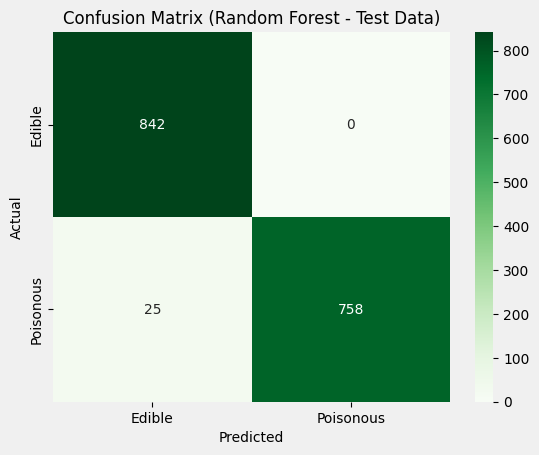

In [51]:
# Confusion matrix for test data
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf,
            annot=True,
            fmt='d',
            cmap='Greens',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Test Data)')
plt.show()

#### Section 5 Reflection

The Random Forest classifier produced nearly identical results to the decision tree. Both models achieved high accuracy, precision, and recall on the test set, which suggests that the selected features — `odor` and `gill-color` — are strong predictors on their own.

The lack of improvement from the Random Forest likely indicates that the data is not very noisy and the patterns are clear enough that a single decision tree can already perform at a high level. While the Random Forest could offer more stability or reduce overfitting in more complex scenarios, it didn’t provide a noticeable benefit here. In this case, the simpler decision tree is just as effective.

## 6. Final Thoughts & Insights

#### **6.1 Summarize Findings**
This project used the Mushroom dataset to predict whether mushrooms are edible or poisonous based on different features. After exploring the data, two highly predictive features were selected: `odor` and `gill-color`. A decision tree classifier achieved high accuracy, and a random forest model produced nearly identical results. Both models performed well, demonstrating that even with only two features, classification could be done effectively.

#### **6.2 Discuss Challenges Faced**
The biggest challenge was understanding how to properly encode categorical variables and deciding which type of encoding was appropriate for different models. Another challenge was figuring out how to interpret performance metrics like precision, recall, and F1-score in a meaningful way, especially when the results were already very high.

#### **6.3 If You Had More Time, What Would You Try Next?**
With more time, it would be helpful to explore additional features or try more advanced models like gradient boosting. It would also be interesting to experiment with feature selection techniques or visualizations that explain which features have the most impact. Trying out hyperparameter tuning and comparing results could also improve performance or generalizability.

#### **Reflection 6:**
This project helped build a better understanding of classification problems, how to train and evaluate models, and how feature selection can impact model performance. It also made it clear that strong features can allow even simple models to perform very well. Getting more comfortable with encoding, confusion matrices, and reading model evaluation reports was a big takeaway from this process.
